In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X


In [3]:
x0 = np.linspace(-50 * um, 50 * um, 1024 * 32)
wavelength = .5 * um

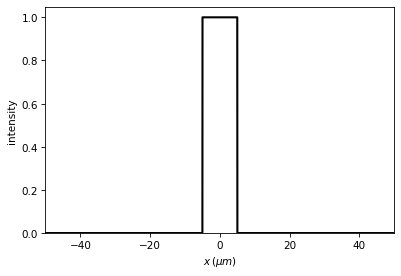

In [4]:
# plane wave
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0)

# slit
t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=10 * um)
t0.draw()

u1 = u0 * t0

(0.0, 11268784.8)

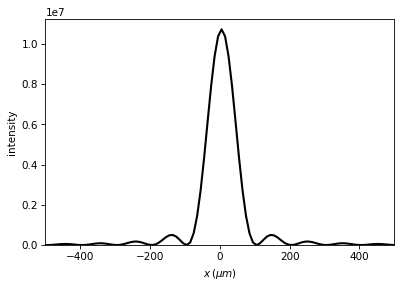

In [5]:
u2 = u1.fft(z=2 * mm, remove0=False, new_field=True)
u2.draw(kind='intensity', logarithm=False, normalize=True)
plt.xlim(-500, 500)
plt.ylim(bottom=0)

In [8]:
u2 = u1.WPM(z=20 * mm, remove0=False, new_field=True)
u2.draw(kind='intensity', logarithm=False, normalize=True)
plt.xlim(-5000, 5000)
plt.ylim(bottom=0)

TypeError: WPM() got an unexpected keyword argument 'z'

Good result: factor 2799.70


(-500.0, 500.0)

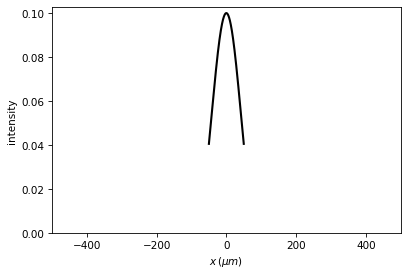

In [41]:
t2 = u1.RS(z=2 * mm, verbose=True)
# t2.normalize()
t2.draw()
plt.xlim(-500, 500)
# plt.ylim(bottom=0)

CPU times: user 56.6 ms, sys: 4.23 ms, total: 60.9 ms
Wall time: 60.2 ms


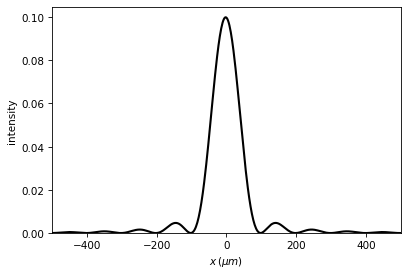

In [22]:
%%time
xout=np.linspace(-500,500,512)
u2_czt = u1.CZT(z=2*mm, xout=xout)
u2_czt.draw()


In [23]:
dir(u2)

['CZT',
 'MTF',
 'RS',
 'WPM',
 '_RS_',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 'average_intensity',
 'clear_field',
 'conjugate',
 'cut_resample',
 'date',
 'draw',
 'duplicate',
 'fft',
 'filter',
 'get_RS_minimum_z',
 'get_edges',
 'ifft',
 'incident_field',
 'info',
 'insert_array_masks',
 'insert_mask',
 'intensity',
 'inverse_amplitude',
 'inverse_phase',
 'load_data',
 'n_background',
 'normalize',
 'pupil',
 'quality',
 'reduce_to_1',
 'repeat_structure',
 'save_data',
 'type',
 'u',
 'wavelength',
 'x']

In [26]:
u2.u

array([ 0.00000000e+00+0.j        ,  2.96196397e-05-0.30894405j,
       -1.12682615e-04+0.58766114j, ...,  2.32651699e-04+0.80888173j,
       -1.12682614e-04-0.58766114j,  2.96196404e-05+0.30894405j])

In [27]:
from matplotlib import pyplot as plt

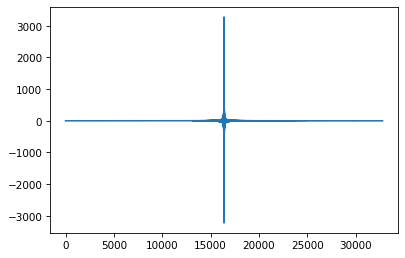

In [32]:
plt.plot(u2.u.real)
plt.show()

In [33]:
u2.u.real.shape

(32768,)

In [36]:
%%time
xout=np.linspace(-500,500,512)
u3 = u1.WPM()
u3.draw()
# WPM need XZ, even the source is X_scaler

TypeError: WPM() missing 2 required positional arguments: 'fn' and 'zs'

In [42]:
dir(t0)

['CZT',
 'MTF',
 'RS',
 'WPM',
 '_RS_',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 'aspheric',
 'average_intensity',
 'binary_code',
 'binary_code_positions',
 'binary_grating',
 'biprism_fresnel',
 'biprism_fresnel_nh',
 'blazed_grating',
 'chirped_grating',
 'chirped_grating_p',
 'chirped_grating_q',
 'clear_field',
 'conjugate',
 'cut_resample',
 'date',
 'dots',
 'double_slit',
 'draw',
 'duplicate',
 'dust',
 'dust_different_sizes',
 'fft',
 'filter',
 'fresnel_lens',
 'get_RS_minimum_z',
 'get_edges',
 'gray_scale',
 'ifft',
 'incident_field',
 'info',
 'insert_array_masks',
 'insert_mask',
 'intensity',
 'inverse_amplitud

(0.0, 708915995.6076945)

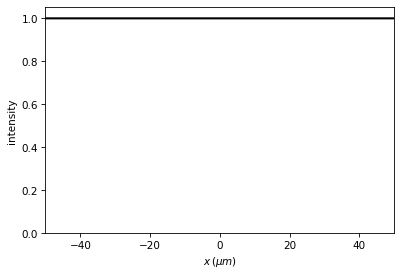

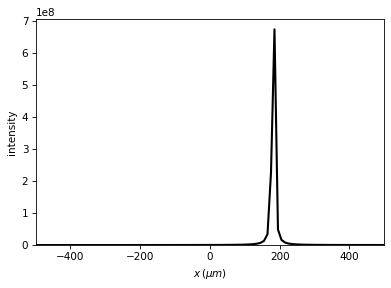

In [53]:
# try different mask
t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.prism(x0=0,n=1.5,angle=10*degrees)
t1.draw()

u4=u0*t1
u44 = u4.fft(z=2 * mm, remove0=False, new_field=True)
u44.draw(kind='intensity', logarithm=False, normalize=True)
plt.xlim(-500, 500)
plt.ylim(bottom=0)

(0.0, 25079562.06751961)

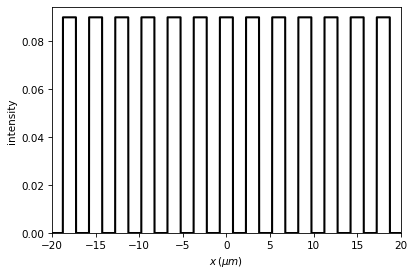

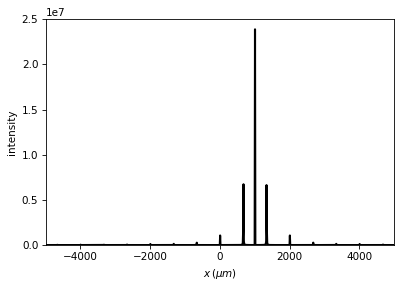

In [64]:
# try different mask
u00 = Scalar_source_X(x=x0, wavelength=wavelength)
u00.plane_wave(A=1, theta=30*degrees)
t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.binary_grating(x0=0,period=3000*nm,fill_factor=0.5,amin=1*nm,amax=300*nm,phase=0)
t1.draw()
plt.xlim(-20, 20)

u4=u00*t1
u44 = u4.fft(z=2 * mm, remove0=False, new_field=True)
u44.draw(kind='intensity', logarithm=False, normalize=True)
plt.xlim(-5000, 5000)
plt.ylim(bottom=0)

(0.0, 1126456378.095737)

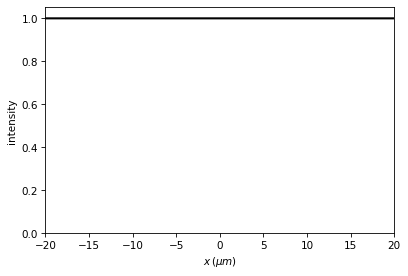

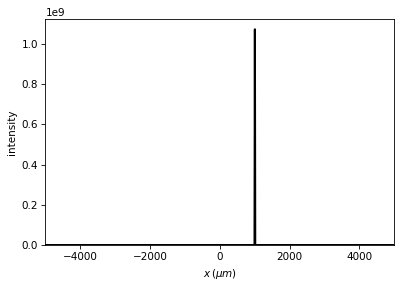

In [68]:
# try different mask
u00 = Scalar_source_X(x=x0, wavelength=wavelength)
u00.plane_wave(A=1, theta=30*degrees)
t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.blazed_grating(x0=0,period=300*nm,phase_max=0.1)
t1.draw()
plt.xlim(-20, 20)

u4=u00*t1
u44 = u4.fft(z=2 * mm, remove0=False, new_field=True)
u44.draw(kind='intensity', logarithm=False, normalize=True)
plt.xlim(-5000, 5000)
plt.ylim(bottom=0)

(0.0, 17060.416066750273)

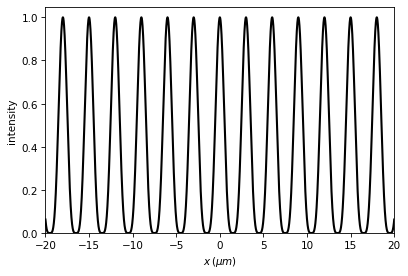

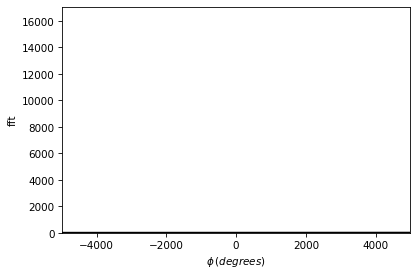

In [74]:
# try different mask
u00 = Scalar_source_X(x=x0, wavelength=wavelength)
u00.plane_wave(A=1, theta=30*degrees)
t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.sine_grating(x0=0,period=3000*nm)
t1.draw()
plt.xlim(-20, 20)

u4=u00*t1
u44 = u4.fft(z=2 * mm, remove0=False, new_field=True)
u44.draw(kind='fft', logarithm=False, normalize=True)
plt.xlim(-5000, 5000)
plt.ylim(bottom=0)

(0.0, 614095445.523075)

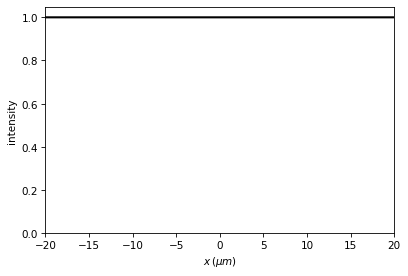

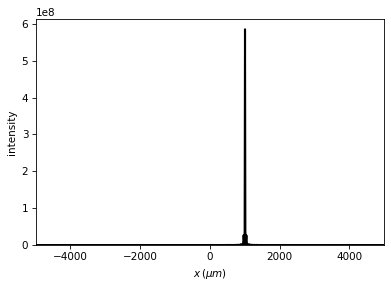

In [79]:
# try different mask
u00 = Scalar_source_X(x=x0, wavelength=wavelength)
u00.plane_wave(A=1, theta=30*degrees)
t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.fresnel_lens(x0=0,focal=2*mm)
t1.draw()
plt.xlim(-20, 20)

u4=u00*t1
u44 = u4.fft(z=2 * mm, remove0=False, new_field=True)
u44.draw(kind='intensity', logarithm=False, normalize=True)
plt.xlim(-5000, 5000)
plt.ylim(bottom=0)

(-40.0, 40.0)

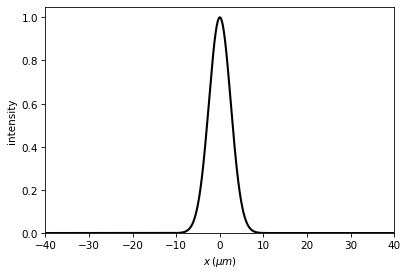

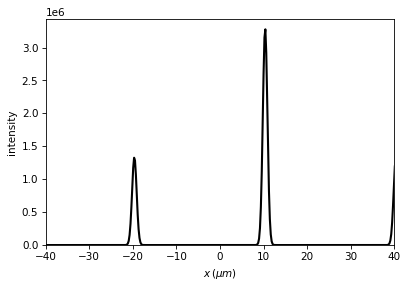

In [26]:
x0 = np.linspace(-40 * um, 40 * um, 1024 * 32)
wavelength = .55 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=20* degrees, 
              x0=0 * um, z0=0*um,  w0=5 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.ronchi_grating(period=.55 * um, x0=0 * um, fill_factor=0.5)

u1=u0*t0

u44 = u1.fft(z=.03 * mm, remove0=False, new_field=True)
u44.draw(kind='intensity', logarithm=False, normalize=True)

plt.xlim(-40, 40)

(-100.0, 100.0)

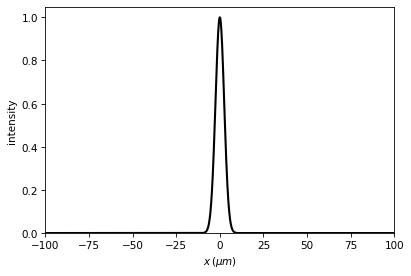

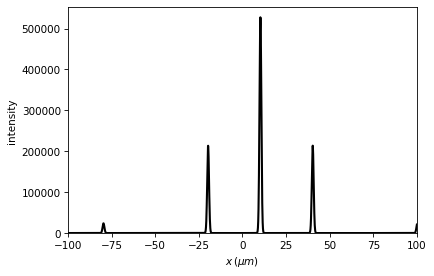

In [29]:
x0 = np.linspace(-100 * um, 100 * um, 1024 * 32)
wavelength = .55 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=20* degrees, 
              x0=0 * um, z0=0*um,  w0=5 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.ronchi_grating(period=.55 * um, x0=0 * um, fill_factor=0.5)

u1=u0*t0

u44 = u1.fft(z=.03 * mm, remove0=False, new_field=True)
u44.draw(kind='intensity', logarithm=False, normalize=True)

plt.xlim(-100, 100)

Good result: factor 37.15


(-2000.0, 2000.0)

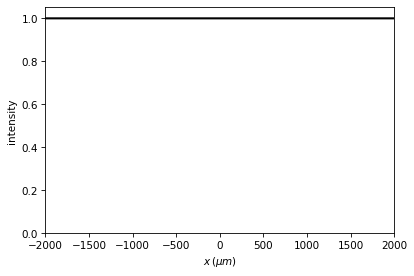

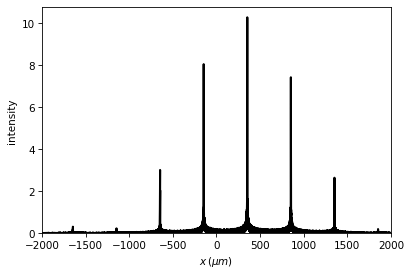

In [40]:
x0 = np.linspace(-2000 * um, 2000 * um, 1024 * 512)
wavelength = .55 * um

u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=45* degrees);
# u0.pupil(x0=0,radius=300*um)
#               x0=0 * um, z0=0*um,  w0=5 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.binary_grating(period=wavelength,x0=0*um,fill_factor=0.3,
                  amin=0,amax=1,phase=np.pi)
# t0.ronchi_grating(period=.55 * um, x0=0 * um, fill_factor=0.5)

t1=Scalar_mask_X(x=x0,wavelength=wavelength)
t1.lens(x0=0*um,focal=.5*mm)

u1=u0*t0*t1

u44 = u1.RS(z= .5* mm,  new_field=True)
# u44 = u1.fft(z= .5* mm, remove0=False, new_field=True)
u44.draw(kind='intensity', logarithm=False, normalize=True)

plt.xlim(-2000, 2000)